# **Exploring the Nutrition Data on Cereals**

#### Manling Zhao
#### CMSC320 Final Project
#### May 15th 2020

## Introduction

Do you like eating cereals? If you do, then you must take a look at this exercise. Most cereals in the market, as we may all know, contain added sugars. Although the sugars added a more favorable taste to the cereal, they may very well be the single worst ingredient in the modern diet [4]. It contributes to several chronic diseases, and as one of the many processed foods that contain those sugars, the health problems that may cause by eating a large amount of cereals are concerning people. In this tutorial, we are going to analyze a dataset that contains 77 samples of cereals that can be found in the market. We'll be examining mostly on the sugar levels and calories of all the products, in conjunction with their ratings and their brands. We also want to look at the relationships between them and understand the correlation among the nutrition of the cereals. We will also be performing a T-test on the different types of cereals and their calories to see if they are related or not.

This tutorial will be guiding you step by step, from the basic setup to the analysis with visualizations and statistics on this dataset of cereals and are all done in fundamental level. Additional sources that will help with some specific topics will also be included at the bottom.

### Table of Content
1. Preparation Before We Start
2. Data Wrangling
3. Exploratory Data Analysis: Visualization
4. Exploratory Data Analysis: Summary Statistics
5. Machine Learning
6. Conclusion
7. References

## Preparation Before We Start

The very first thing we want to do is to install python3 and its packages. Below are the commands for installing some basic modules that we'll use in this tutorial. To check out all the module descriptions, see [here](https://pypi.org).

```python
$ pip install numpy         --> NumPy is the fundamental package for array computing with Python.
$ pip install pandas        --> Powerful data structures for data analysis, time series, and statistics
$ pip install matplotlib    --> Used for data visualization and graphs
$ pip install ipyleaflet    --> A Jupyter widget for dynamic Leaflet maps
```

## Data Wrangling

The first step is to import all the libraries we are going to use in this project, and then we import the .csv file that contains the data we need. The basic process of loading data from a .csv file into a Pandas DataFrame is achieved using the “read_csv” function in Pandas. Remember to make sure that the file path is correct. For more explanation on how reading data works, click [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/).

In [52]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # for the t-test we'll be doing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read file
cereal_table = pd.read_csv('cereal.csv')
# Printing out the table
cereal_table

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


To check the type of the attributes, we use .dtypes like shown below. Knowing the data types is useful for any further calculations between rows or columns on deciding the type conversions.

In [32]:
cereal_table.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

Now I have imported the data of 77 different kinds of cereals. Here we can see 16 different attributes (columns) that shows the description and nutrition info of each cereal, but some of the terms like 'mfr' and 'type' may not be clear to the audience, so we want to make some modifications to the attribute names. We would also like to add the unit of measurement to the attributes like 'calories', 'protein', and 'fat'. In addition, the 'shelf' attribute, which indicates the number of each cereal's display shelf, is not needed in our analysis, so we can delete it. We can also tidy the table up by ranking the entities (rows) by their ratings. Let's see the code.

In [3]:
# First rename the attributes to some more meaningful terms.
cereal_table.columns = ['name','manufacturer','type','calories(per serving)','protein(g)', 
                        'fat(g)', 'sodium(mg)','fiber(g)','carbo(g)','sugars(g)', 'potass(mg)', 
                        'vitamins_recommend(%)', 'shelf', 'weight(oz)', 'cups', 'rating']
# Remove the column 'shelf'
cereal_table = cereal_table.drop(['shelf'], axis=1)

# Rearrange the rows by the rating in decending order.
cereal_table = cereal_table.sort_values(by='rating', ascending=0)

# Replace the abbreviations of the manufacturers and the types with their actual names.
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('A', 'American Home Food Products')
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('G', 'General Mills')
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('K', 'Kelloggs')
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('N', 'Nabisco')
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('P', 'Post')
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('Q', 'Quaker Oats')
cereal_table['manufacturer'] = cereal_table['manufacturer'].replace('R', 'Ralston Purina')
cereal_table['type'] = cereal_table['type'].replace('C', 'Cold')
cereal_table['type'] = cereal_table['type'].replace('H', 'Hot')

# Print out the table
cereal_table

,name,manufacturer,type,calories(per serving),protein(g),fat(g),sodium(mg),fiber(g),carbo(g),sugars(g),potass(mg),vitamins_recommend(%),weight(oz),cups,rating
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,Nabisco,Cold,90,3,0,0,4.0,19.0,0,140,0,1.00,0.67,74.472949
65,Shredded Wheat spoon size,Nabisco,Cold,90,3,0,0,3.0,20.0,0,120,0,1.00,0.67,72.801787
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,1.00,0.33,68.402973
63,Shredded Wheat,Nabisco,Cold,80,2,0,0,3.0,16.0,0,95,0,0.83,1.00,68.235885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Cocoa Puffs,General Mills,Cold,110,1,1,180,0.0,12.0,13,55,25,1.00,1.00,22.736446
18,Count Chocula,General Mills,Cold,110,1,1,180,0.0,12.0,13,65,25,1.00,1.00,22.396513
35,Honey Graham Ohs,Quaker Oats,Cold,120,1,2,220,1.0,12.0,11,45,25,1.00,1.00,21.871292
12,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0.0,13.0,9,45,25,1.00,0.75,19.823573


## Exploratory Data Analysis: Visualization

In this section, we'll be doing some analysis of the data that we just tidied up. Specifically, we want to know how sugar and calories would affect a person's fondness on a cereal. To help with our analysis, we will be using graphs for visualizations in order to see the data more intuitively. To plot the graphs, here I'm using two different visualization libraries, matplotlib and seaborn. Seaborn uses fewer syntax and has stunning default themes and Matplotlib is more easily customizable through accessing the classes [3].

The first analysis will be looking at the number of cereals of each manufacturer. The visualization is shown as a stacked bar plot, where the number of cold and hot cereals of each brand is also shown. From the graph, we can clearly see that most of the cereals are cold cereals, and the only the brand 'American Home Food Products' produces all hot cereals. The plot is just a general graph that shows the basic info of each manufacturer.

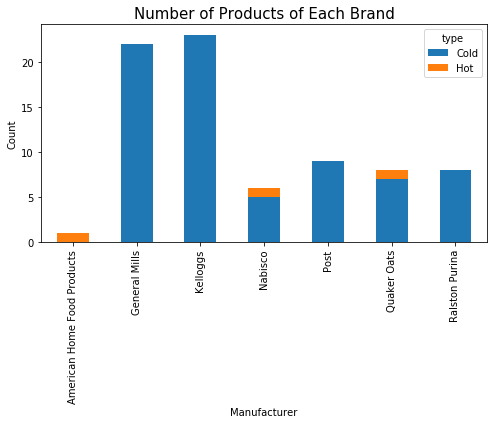

In [34]:
new_df = cereal_table.groupby(['manufacturer', 'type'])['manufacturer'].count().unstack('type').fillna(0)
new_df[['Cold','Hot']].plot(kind='bar', stacked=True)
plt.xlabel("Manufacturer")  
plt.ylabel("Count")
plt.title("Number of Products of Each Brand",fontsize=15)
plt.gcf().set_size_inches(8, 4)

In addition to comparing the number of cold cereals and hot cereals for each brand, we can also do something different by visualizing the ratings, sugar level, and calories level of each product. By doing the visualization, we can see an approximate relationship between these three attributes. We can also visualize the other attributes like 'fiber' and 'carbo', but since we are mainly interested in how sugar and calories would affect customers' satisfaction, we will be only looking at these two. Let's first take a look at the rating of all the products in the dataset.

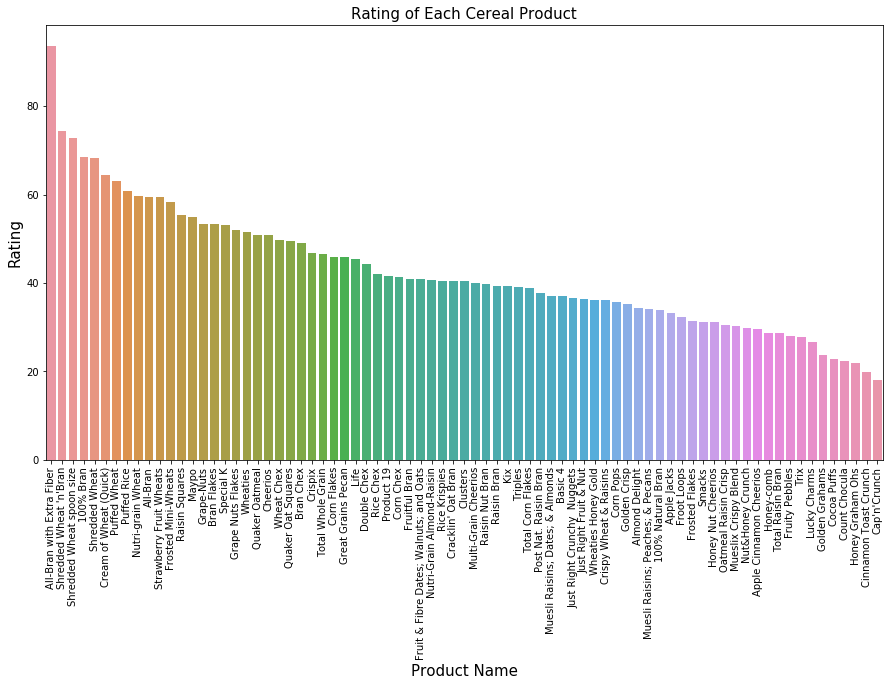

In [12]:
# Rating with calories
# Preparing dataframe for the graph
name_list = list(cereal_table["name"].unique())
rating_rate = []
for i in name_list:
    x = cereal_table[cereal_table["name"]==i]
    rating_ratio = sum(x.rating/len(x))
    rating_rate.append(rating_ratio)
data = pd.DataFrame({"name_list":name_list,"rating_rate":rating_rate})

# Plot the graph
plt.figure(figsize=(15,8))
sns.barplot(x=data["name_list"],y=data["rating_rate"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title("Rating of Each Cereal Product",fontsize=15)
plt.xticks(rotation=90)
plt.show()

We also want to know the amount of sugar that contains in each product, as well as the calories of each of them, so that we can compare the graphs with the one above and see how the level of sugars and calories can affect the ratings of the products. We apply the almost-same code as above for preparing the two graphs. However, note that since we have already sorted the cereal_table by the product ratings in descending order, the plot above looks descending, but the plot for the sugar level and the plot for calories level won't look similar.

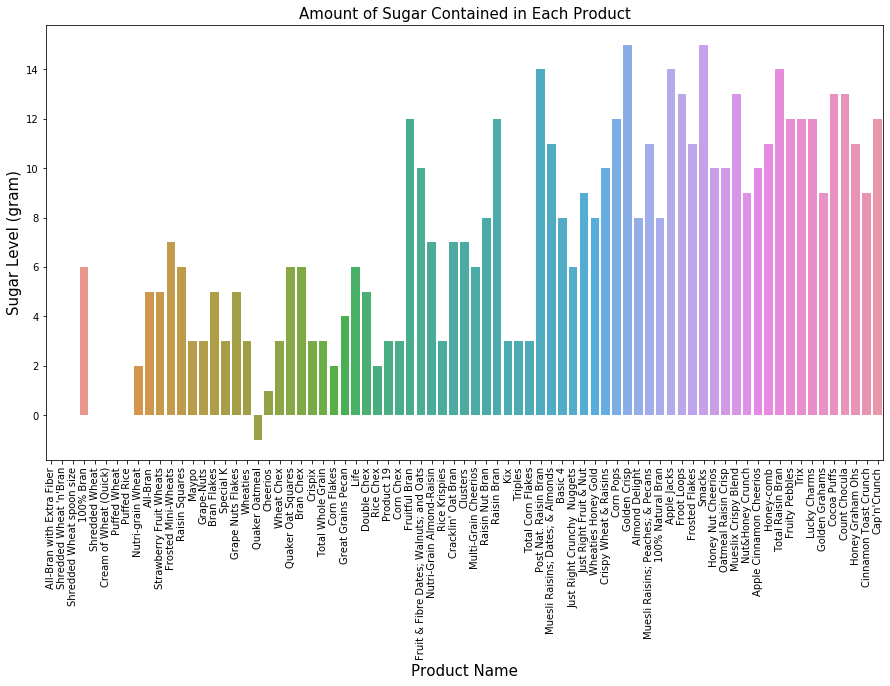

In [206]:
# Rating with sugar level
name_list = list(cereal_table["name"].unique())
sugar_level = []
for i in name_list:
    x = cereal[cereal["name"]==i]
    sugar_level.append(x.sugars)
data = pd.DataFrame({"name_list":name_list,"sugar_level":sugar_level})

# Plot the graph
plt.figure(figsize=(15,8))
sns.barplot(x=data["name_list"],y=data["sugar_level"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("Sugar Level (gram)",fontsize=15)
plt.title("Amount of Sugar Contained in Each Product",fontsize=15)
plt.xticks(rotation=90)
plt.show()

By comparing the two plots above, it is clear that products that have higher ratings tend to contain less sugar. Customers can choose their desired product with the references from this graph, but some customers prefer specific manufacturers/brands. So now our question would be, which manufacturer tends to produce the cereals that contain a smaller amount of sugar? We can compare this using a stacked bar plot as shown below.

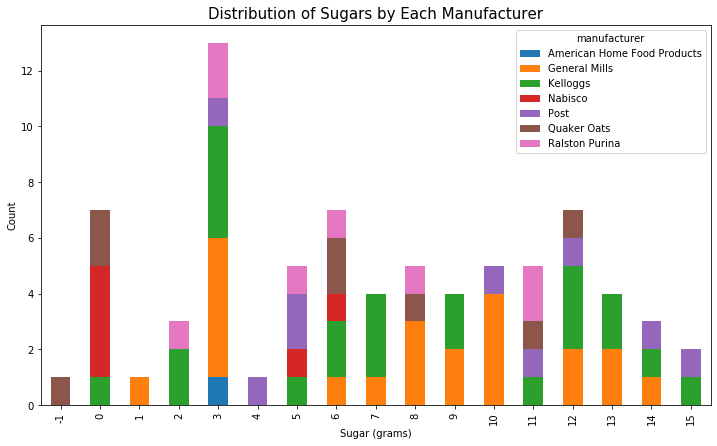

In [4]:
# Plotting
new_df = cereal_table.groupby(['sugars(g)','manufacturer'])['sugars(g)'].count().unstack('manufacturer').fillna(0)
new_df[['American Home Food Products','General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']].plot(kind='bar', stacked=True)
# Edit Label and Title
plt.xlabel("Sugar (grams)")  
plt.ylabel("Count")
plt.title("Distribution of Sugars by Each Manufacturer",fontsize=15)
plt.gcf().set_size_inches(12, 7)

This plot clearly showed us that Kelloggs, Post, and General Mills are the three brands that produces the cereals with most added sugars among the 77 samples. It is also obvious that many of the cereals contain 3 grams of sugars per serving, and about more than a half of the samples are in the range from 4 grams to 15 grams. According to the article by Healthline, the American Health Association suggests the max amount of sugar in take to be 37.5 grams for men and 25 grams for women per day [5], and people generally have more than the amount of serving listed on these product descriptions according to this [experiment](https://www.insider.com/i-tried-following-the-recommended-serving-sizes-for-a-week-2019-7) [6], which implies that the sugar intake from the cereals can be doubled or even tripled. That would serve as a huge portion in the recommended daily sugar intake, so having too much cereal would indeed cause some health problems.

Aside from what we have done, we can also look more specifically in detail on how the sugar levels of the products by each brand distributes. We can use a boxplot to get some info on the measures of central tendency.

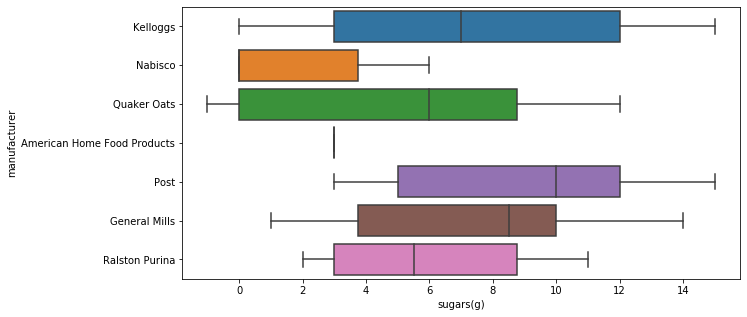

In [9]:
sns.boxplot(x="sugars(g)", y="manufacturer", data=cereal_table)
plt.gcf().set_size_inches(10, 5)

From the plot, we can see that there's a difference between the group of Nabisco and American Home Food Products with the group of the other brands, since the median lines of the brands in the other group are outside of the boxes of Nabisco and AHFP. Furthermore, we can see that the distribution of Kelloggs and Quaker Oats are wider compared to other brands, since their range is wider. This indicates that their data are more scattered. Overall, we can see that Nabisco and AHFP has less sugars in their products comparing with the other manufacturers.

In addition to analyzing the sugar level, let's also take a look at the calories contained in the cereals. We will apply the same methods as we've done to measuring the sugar level. First start with the barplot of calories contained in each product.

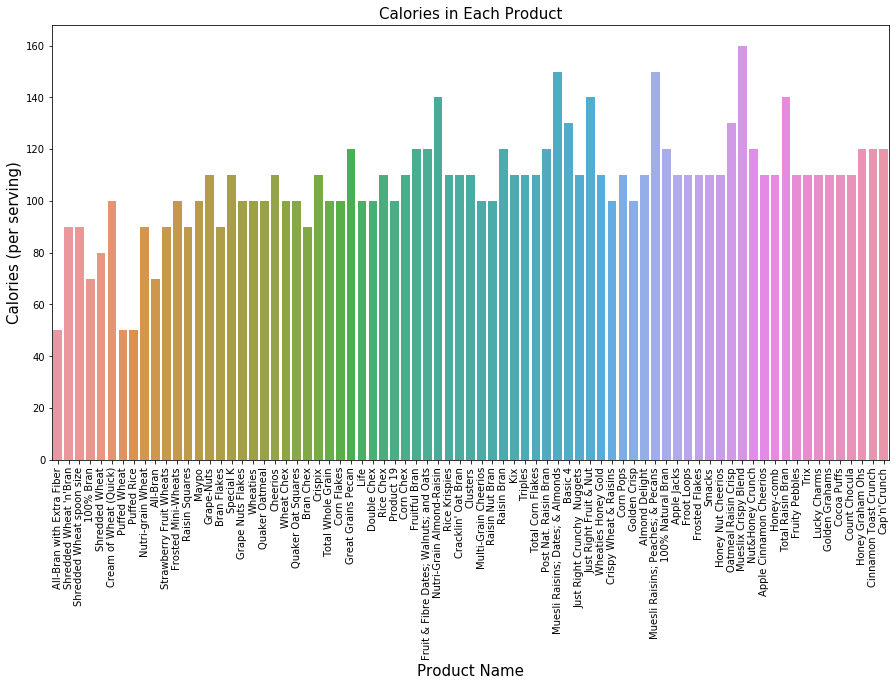

In [207]:
# Rating with calories level
name_list = list(cereal_table["name"].unique())
cal_level = []
for i in name_list:
    x = cereal[cereal["name"]==i]
    cal_level.append(x.calories)
data = pd.DataFrame({"name_list":name_list,"cal_level":cal_level})

# Plot the graph
plt.figure(figsize=(15,8))
sns.barplot(x=data["name_list"],y=data["cal_level"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("Calories (per serving)",fontsize=15)
plt.title("Calories in Each Product",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Comparing this plot with the rating bar plot above, it shows that some products that have the least calories have higher ratings. However, calories of all the procuts in general are pretty equal. Many products contain similar amount of calories, and it doesn't seem to related much with the amount of sugars each product contains comparing with the sugar level barplot. It is also pretty clear that since differences in calories are small, calories level doesn't seem to be playing a huge role in customer's rating scale. Let's further analyze the calories using the stacked barplot as shown below.

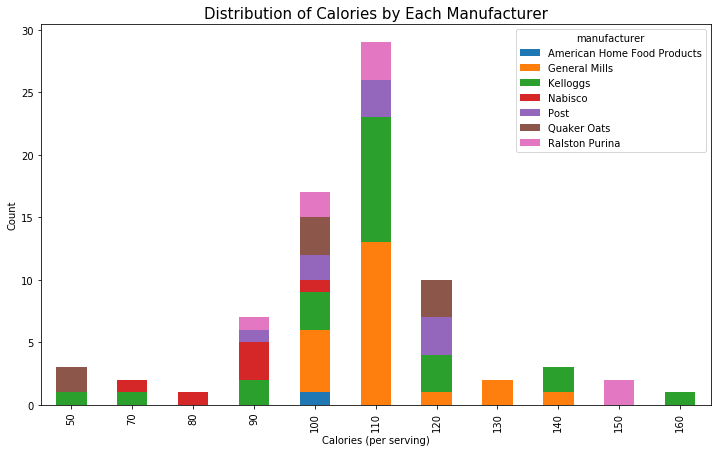

In [6]:
new_df = cereal_table.groupby(['calories(per serving)','manufacturer'])['calories(per serving)'].count().unstack('manufacturer').fillna(0)
new_df[['American Home Food Products','General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']].plot(kind='bar', stacked=True)
plt.xlabel("Calories (per serving)")  
plt.ylabel("Count")
plt.title("Distribution of Calories by Each Manufacturer",fontsize=15)
plt.gcf().set_size_inches(12, 7)

The barplot shows that a large amount of the cereals contains 110 calories per serving. Kelloggs has one product that has the highest calories of 160 per serving, and it as well has a product that has the least calories. It also has a large variety of the calories' distribution. Let's now take a look at the boxplot on the calories of product by the manufacturers.

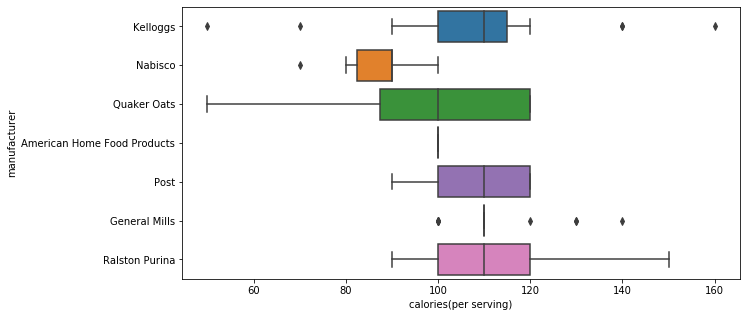

In [10]:
sns.boxplot(x="calories(per serving)", y="manufacturer", data=cereal_table)
plt.gcf().set_size_inches(10, 5)

From the plot we can see that the data of calories of Post and Ralston Purina seem to have normal distributions. Quaker Oats has the widest range, from 50 to 120.

## Exploratory Data Analysis: Summary Statistics

In this section, we are going to do some statistical analysis with the correlation matrix. I will also be performing t-tests to solve the problem of whether the sugar and calories contained in the cold and hot cereals are related or not.

A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses [7]. It shows the correlation coefficients between sets of variables. Each variable is correlated to the other one, and this matrix allows us to see which pair has the highest correlation. From the graph below, we can see that there is a positive correlation between the calories and the sugars, which illustrates that sugar does contributes to the calories. However, the correlation between calories and ratings as well as the correlation between sugars and ratings are both negative. This implies that although the products that have higher ratings tend to contain less sugar, as described above.

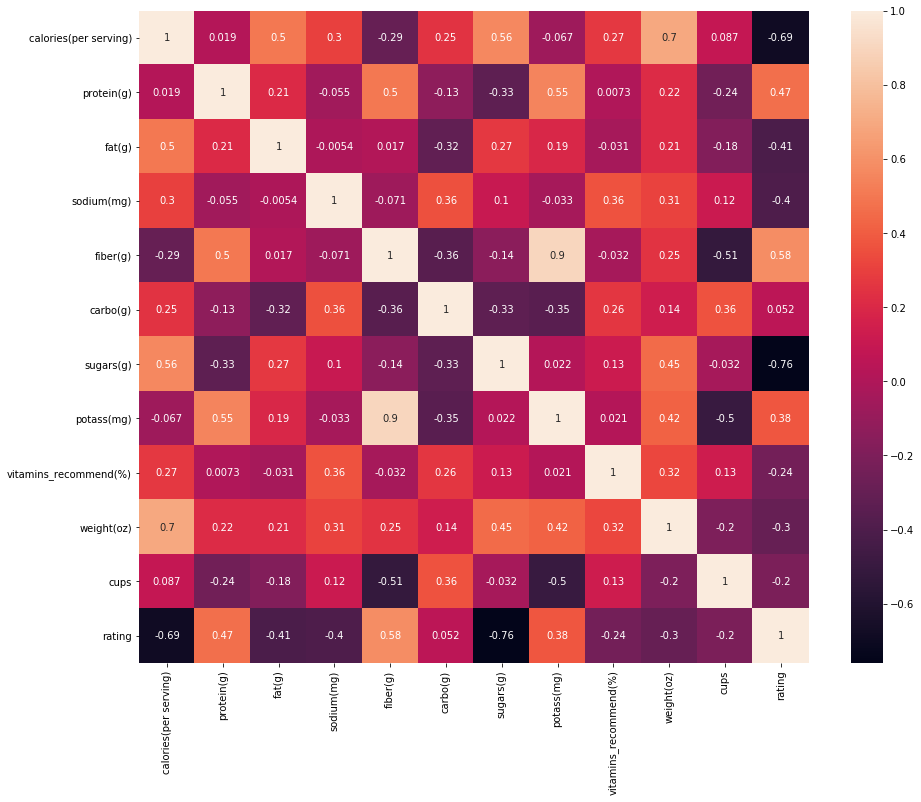

In [38]:
# Visualization
plt.figure(figsize=(15,12))
sns.heatmap(cereal_table.corr(), annot=True)
plt.show()

## Machine Learning

In this section, we'll be exploring the use of linear regression and classification models. A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes [8]. We'll be using the following supervised models for classification:

Logistic Regression

K-Nearest Neighbors

Decision Trees

Random Forest

Support Vector Machines


### Linear Regression

First, we are going to use a linear regression model to find the relationship between sugar and calories of the products. Linear regression is a statistical model that examines the linear relationship between two or more variables — a dependent variable and independent variables. Linear relationship basically means that when one independent variables increases or decreases, the dependent variable increases or decreases too.

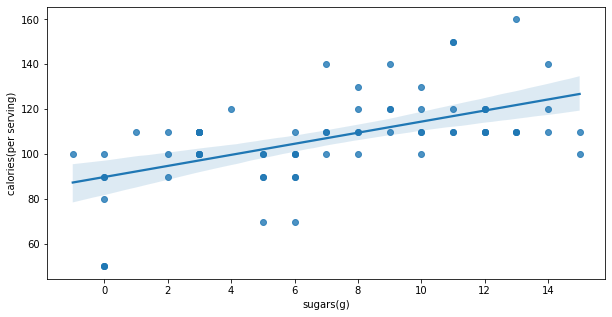

In [42]:
# Linear Regression Line
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x="sugars(g)", y="calories(per serving)", data=cereal_table, ax=ax)

To do the classification, we first need to clean up the data and find the training set and test set we are going to use. Here, I'm interested in the relationship between the nutritions of the cereals and their types, we are going to separate the dataset as follows:

In [107]:
# Remove unwanted columns
feature_df = cereal_table[['calories(per serving)', 'protein(g)',
       'fat(g)', 'sodium(mg)', 'fiber(g)', 'carbo(g)', 'sugars(g)', 'potass(mg)', 'rating']]

# Set independent and dependent vars
X = np.asarray(feature_df)
y = np.asarray(cereal_table['type'])

# Set the training set and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

Logistic regression is a regression model that measures the relationship between the dependent variable (categorical) and a set of the independent variables using a logistic function. For more info on logistic regression, click [here](https://www.geeksforgeeks.org/understanding-logistic-regression/).

In [108]:
# Logistic Regression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(reg, X, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 93.75% - SD Accuracy = 11.52%


### K-Nearest Neighbors

The k-nearest neighbors algorithm, aka knn, is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. For more info, click [here](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761).

In [109]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 96.25% - SD Accuracy = 5.73%


### Decision Tree

A decision tree is a mechanical way to make a decision by dividing the inputs into smaller decisions [8]. It consists of nodes, branches, and leaf nodes. The nodes test for the value of certain attributes, the edges correspond to the outcome of a test and connect to the next node or leaf, and the leaf nodes predict the outcome. For more information on decision trees, click [here](https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac).

In [110]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test) 

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(dtree, X, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 87.50% - SD Accuracy = 22.36%


### Random Forest

A random forest, or random decision forest, is consist of many decision trees. It creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. For more information, check the wiki page on random forest [here](https://en.wikipedia.org/wiki/Random_forest).

In [111]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 96.25% - SD Accuracy = 5.73%


### Support Vector Machine

A support vector machine algorithm finds a hyperplane in an n-dimensional space that distinctly classifies the data points. Check the wiki page [here](https://en.wikipedia.org/wiki/Support_vector_machine) for more info.

In [112]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 96.25% - SD Accuracy = 5.73%


By comparing the accuracies of the algorithms shown above, we can see that k-nearest neighbors, random forest, and support venctor machine score the same.

## Conclusion

This tutorial includes the concepts of data parsing, exploratory data analysis, and machine learning techniques by analyzing a dataset on cereals. Yous should also be able to understand the different algorithms for classification and the way to apply them. Hope this tutorial is helpful!

## References

[1] https://pypi.org

[2] https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/

[3] https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

[4] https://www.healthline.com/nutrition/are-breakfast-cereals-healthy#sugar-and-carbs

[5] https://www.healthline.com/nutrition/how-much-sugar-per-day#section3

[6] https://www.insider.com/i-tried-following-the-recommended-serving-sizes-for-a-week-2019-7

[7] https://www.displayr.com/what-is-a-correlation-matrix/

[8] https://medium.com/fuzz/machine-learning-classification-models-3040f71e2529